Accuracy Score: 0.9717171717171718
Recall Score: 0.9565217391304348
Precision Score: 0.9243697478991597


     0    1
0  742   18
1   10  220





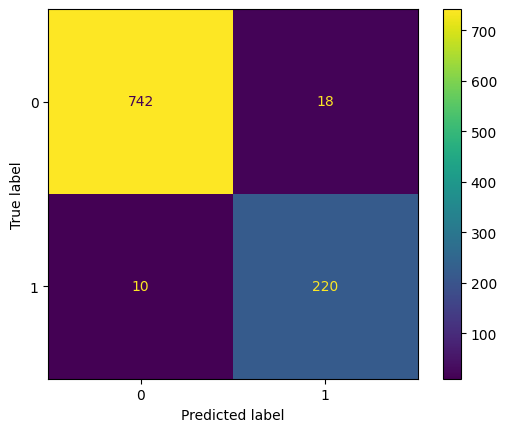

In [38]:
#Import data
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from joblib import load

model = load('saved model.joblib') #load the trained machine

new_dataset = pd.read_csv("data1.csv") #upload any new data sets here!!

pd.DataFrame(new_dataset)

#declare x,y
target = "Loan Approval"
y = new_dataset[target]
x = new_dataset.drop(columns=[target,"Gender","Age"]) 

x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.01, random_state = 42)

pred = model.predict(x_test)


accuracy_score = accuracy_score(y_test,pred)
recall_score = recall_score(y_test,pred, average= "binary")
precision_score = precision_score(y_test,pred,average= "binary")
print(f"Accuracy Score: {accuracy_score}")
print(f"Recall Score: {recall_score}")
print(f"Precision Score: {precision_score}")

cm = confusion_matrix(y_true=y_test, y_pred = pred)
cm1 = pd.DataFrame(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
print(f"\n\n{cm1}")
print("\n\n")
disp.plot()
plt.show()